# Understanding TARDIS Plasma Physics: From Atoms to Spectra

> **Note:** We strongly recommend turning off code autocompletion for this notebook. This exercise is designed to engage your understanding of TARDIS plasma physics and atomic data, rather than relying on automated suggestions. In VSCode, you can temporarily disable autocomplete in notebook cells by navigating to **Settings → Notebook: Suggest Enabled** and unchecking the box, or by creating a workspace with a `.vscode/settings.json` file containing `"notebook.suggest.enabled": false`. This will help you focus on understanding the physics behind each step.

In this notebook, we'll explore how TARDIS calculates the physical conditions inside supernova ejecta. You'll learn about atomic data, ionization states, excitation levels, and how these connect to the spectral lines we observe in supernovae.

In [1]:
from matplotlib import pyplot as plt
from tardis.io.configuration.config_reader import Configuration
from tardis import run_tardis
from astropy import units as u

Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

In [2]:
from tardis.io.atom_data import download_atom_data, AtomData
# Download the Kurucz CD23 atomic data This is a basic atomic data set. Will not download if already present.
download_atom_data('kurucz_cd23_chianti_H_He_latest')

Atomic Data kurucz_cd23_chianti_H_He_latest already exists in /Users/joshuashields/Downloads/tardis-data/kurucz_cd23_chianti_H_He_latest.h5. Will not download - override with force_download=True.


## Starting with a Converged Simulation

We saw how to ensure TARDIS converges properly in the previous notebook. Here, we'll start with a well-converged simulation so we can focus on understanding the plasma physics.

**$\blacktriangleright$ TASK**  Load in the config and run the simulation again by executing the two cells below. Recall what each of the values we're changing updates in the simulation. 

<div style="background-color: #e3f2fd; border-left: 4px solid #2196f3; padding: 10px; margin: 10px 0;">
<strong>**Note:**</strong> The configuration below uses the convergence parameters we learned about in the previous notebook to ensure reliable results.
</div>

In [3]:
conf = Configuration.from_yaml('tardis_example.yml') 
conf.montecarlo.no_of_packets=1e4 
conf.montecarlo.iterations = 10  
conf.montecarlo.last_no_of_packets = 1e5
conf.montecarlo.convergence_strategy.stop_if_converged = True
conf.montecarlo.convergence_strategy.hold_iterations = 4 


In [4]:
sim = run_tardis(conf, show_convergence_plots=True)

BokehModel(combine_events=True, render_bundle={'docs_json': {'fc70257a-112d-4c08-9ba9-097aaa1b9afd': {'version…

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

TqdmHBox(children=(HTML(value='Packets:\u2007\u2007\u2007', layout=Layout(width='6%')), FloatProgress(value=0.…

    'data': [{'type': 'scatter', 'uid': 'e450e520-017e-45c0-b6be-d1109f2c9ad9', …

## Atomic Data: The Foundation of Plasma Physics

One TARDIS input that we've seen but haven't focused on is the **Atomic Data**. This is generated by the sister package [CARSUS](https://tardis-sn.github.io/carsus/), which creates novel combinations of atomic data from various sources. 

**$\blacktriangleright$ TASK** - Before we dive into the plasma physics, let's understand what atomic data TARDIS needs:

1. **Think about it:** What atomic properties would you need to calculate ionization states?
2. **Consider:** What information is required to determine which spectral lines can form?

The atomic data provides all the information the simulation needs about the elements in the ejecta: elemental masses, ionization energies, excitation energies, and line transition probabilities.

## Double click to edit this cell, and put your thoughts down here

Add solution cell - we need ionization energies, excitation energies, line info (oscillator strengths)

In [5]:
#NOTE - we do not need to load this as a standalone object for a TARDIS simulation, 
# but we can do so to inspect the data before it's used if we want.
atomic_data = AtomData.from_hdf('kurucz_cd23_chianti_H_He_latest.h5')

[tardis.io.atom_data.util][INFO   ]  
	Atom Data kurucz_cd23_chianti_H_He_latest.h5 not found in local path.
	Exists in TARDIS Data repo /Users/joshuashields/Downloads/tardis-data/kurucz_cd23_chianti_H_He_latest.h5 (util.py:34)
[tardis.io.atom_data.base][INFO   ]  Reading Atom Data with: UUID = b58b2ef63bf811f08edf96479f911fbd MD5  = 5d80fa4ae0638469bf1ff281b6ca2a94  (base.py:258)
[tardis.io.atom_data.base][INFO   ]  Non provided Atomic Data: levels, lines, collision_data, collision_data_temperatures, synpp_refs, photoionization_data, yg_data, two_photon_data, linelist_atoms, linelist_molecules (base.py:262)


The atomic data provides all of the information that the simulation needs about the elements in the ejecta. This includes elemental masses to help us convert mass fractions into actual number densities, but perhaps the most important parts are the information about the energies associated with ionizing and exciting the atoms, and information about the line transitions between excited states. Let's take a look. 

In [6]:
atomic_data.levels

energy  g  metastable
atomic_number ion_number level_number                             
1             0          0             0.000000e+00  2        True
                         1             1.634029e-11  2       False
                         2             1.634030e-11  2        True
                         3             1.634036e-11  4       False
                         4             1.936630e-11  2       False
...                                             ... ..         ...
30            26         0             0.000000e+00  1        True
              27         0             0.000000e+00  2        True
              28         0             0.000000e+00  1        True
              29         0             0.000000e+00  2        True
              30         0             0.000000e+00  1        True

[24806 rows x 3 columns]

In [7]:
atomic_data.ionization_data

atomic_number  ion_number
1              1             2.178709e-11
2              1             3.939334e-11
               2             8.718687e-11
3              1             8.638479e-12
               2             1.211888e-10
                                 ...     
30             26            3.991823e-09
               27            4.277651e-09
               28            4.457249e-09
               29            1.900973e-08
               30            1.984925e-08
Name: ionization_energy, Length: 465, dtype: float64

### Exploring Ionization Energies

**$\blacktriangleright$ TASK** - Let's verify some basic atomic physics using the loaded atomic data.

The energy required to remove one electron from neutral Oxygen (O I → O II) is about 13.6 eV. See if you can verify this using the atomic data we've loaded.

**Your task:** Find the ionization energy for Oxygen and convert it to eV to check against the expected value.

In [8]:
# Start by grabbing the appropriate ionization energy, and then convert it to the appropriate units. 
# Remember that TARDIS always stores units internally in the CGS unit system.
# Hint: Look for Oxygen (atomic number 8) going from ion_number 0 to 1

# Your code here to find and convert the ionization energy
oxygen_ionization_energy = # Fill this in

# Convert to eV using astropy units
ionization_energy_eV = # Fill this in

ionization_energy_eV

SyntaxError: invalid syntax (4051693127.py, line 6)

In [9]:
# Solution
# Look for Oxygen (atomic number 8) going from ion_number 0 to 1
oxygen_ionization_energy = atomic_data.ionization_data.loc[8, 1]

# Convert from erg to eV using astropy units
ionization_energy_eV = (oxygen_ionization_energy * u.erg).to(u.eV)

ionization_energy_eV

<Quantity 13.618054 eV>

Now let's take a look at the lines information which might be new to you. This dataframe contains all the information we need to talk about how probable an individual line transition is. Specifically, this now includes an "oscillator strength" which appears as f_ul (describing the transition from the less excited state to the more excited state, or lower to upper) and f_lu (upper to lower instead). Remember that, ultimately, we care about opacities. Once we have the number densities of atoms in their specific excitation and ionization state, we need a cross section to calculate the line opacity of the plasma. 

The cross section of a absorption line is given by 

$\sigma_{line} = \frac{\pi e^2}{m_e c}f_{lu}$

You won't need to evaluate this here, but just know that the lines information contains the $f_{lu}$ values we need to go from the number densities we need to the opacities we care about.

In [10]:
atomic_data.lines

line_id  \
atomic_number ion_number level_number_lower level_number_upper            
3             0          21                 67                     1823   
                         28                 67                     1923   
                         37                 67                     2001   
                         44                 67                     2052   
                         51                 67                     2107   
...                                                                 ...   
2             1          11                 21                   533410   
                         13                 21                   533412   
                                            22                   533413   
                         14                 23                   533414   
                         15                 24                   533415   

                                                                   wavelength  \
atomic_number ion_number level_number_lower level_number_upper                  
3             0          21                 67                   16404.775425   
                         28                 67                   27591.968635   
                         37                 67                   43823.900517   
                         44                 67                   67909.408678   
                         51                 67                  105557.600728   
...                                                                       ...   
2             1          11                 21                   10126.280000   
                         13                 21                   10126.505000   
                                            22                   10126.440000   
                         14                 23                   10126.440000   
                         15                 24                   10126.537000   

                                                                    f_ul  \
atomic_number ion_number level_number_lower level_number_upper             
3             0          21                 67                  0.000503   
                         28                 67                  0.001349   
                         37                 67                  0.002767   
                         44                 67                  0.006208   
                         51                 67                  0.011721   
...                                                                  ...   
2             1          11                 21                  0.593500   
                         13                 21                  0.042400   
                                            22                  0.636000   
                         14                 23                  1.009500   
                         15                 24                  1.047000   

                                                                    f_lu  \
atomic_number ion_number level_number_lower level_number_upper             
3             0          21                 67                  0.000252   
                         28                 67                  0.000674   
                         37                 67                  0.001383   
                         44                 67                  0.003104   
                         51                 67                  0.005861   
...                                                                  ...   
2             1          11                 21                  0.890250   
                         13                 21                  0.042400   
                                            22                  0.848000   
                         14                 23                  1.346000   
                         15                 24                  1.308750   

                                                        

## Understanding the simulation

Now let's take a look at what's contained in a TARDIS simulation, once you have something you want to look at more deeply. 

There are a couple different objects that contain different parts of the code. The first, most general one, is what we call the "simulation state." This object contains a lot of the physical properties of the supernova ejecta that are stored in the "composition" and "geometry" objects.

Let's take a look.

In [11]:
geometry = sim.simulation_state.geometry
composition = sim.simulation_state.composition

### Understanding the Simulation Structure

The geometry object contains all the information about the physical size and location of the different ejecta shells. This is crucial because TARDIS calculates physical properties independently for each shell.

**$\blacktriangleright$ Key Insight** - TARDIS uses a shell-based approach:

- Each shell has constant density and temperature
- Most physical properties are computed per shell
- For our example configuration: **20 shells** = 20 data points for most quantities


In [12]:
geometry.no_of_shells

20

In [13]:
len(geometry.volume), len(geometry.r_inner), len(geometry.v_outer)

(20, 20, 20)

TARDIS works formally on a velocity grid. This is largely a result of being a code built assuming homologous expansion, which we've talked about on Monday. To briefly recap, we assume that no net forces are acting on the ejecta, so the ejecta is not accelerating and the structure is frozen in. This lets us, among other things, easily evolve the ejecta profile to any given time since the velocity of each shell will not change. In any case, it is often useful to look at whatever parameter you're interested in plotted against v_inner (or another shell dependent velocity like v_outer) to see how the parameter changes over the ejecta.

**$\blacktriangleright$ TASK** - Explore the relationship between shell structure and physical scales:

1. **Examine the geometry** - How do shell volumes change with velocity?
2. **Consider the physics** - Why might outer shells have different properties?
3. **Think about observations** - How does this relate to what we see in spectra?

After you've thought about this for a minute, the next two cells will show you how you can look at these properties in the TARDIS simulation. Do they match your expectations? Why or why not?

## Solution

Here the students after examining the plots below, the students should see the answers to the questions.

Because of homologous expansion, cells with larger velocities will contain larger volumes. 

Outer shells also experience a more dilute radiation field, so the the temperature will be lower. 

Thehy will also be less dense, so lines that are favored by the plasma in those shells will still have lower optical depths. 

Text(0, 0.5, 'Shell Volume [cm$^3$]')

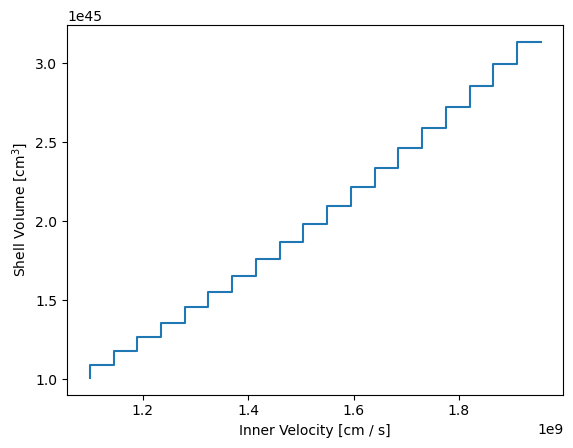

In [14]:
plt.plot(geometry.v_inner, geometry.volume, drawstyle='steps')
plt.xlabel('Inner Velocity [cm / s]')
plt.ylabel('Shell Volume [cm$^3$]')

Text(0, 0.5, 'Shell Density [g cm$^{-3}$]')

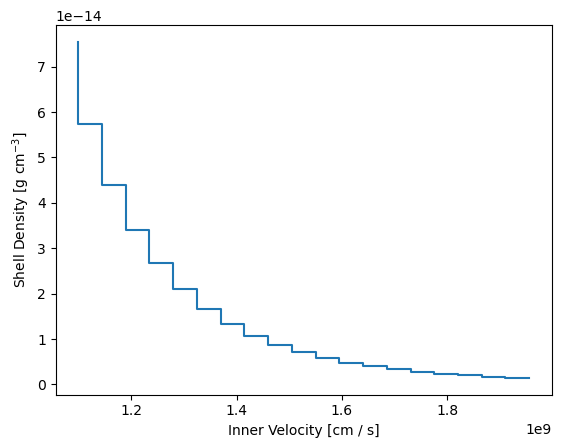

In [15]:
plt.plot(geometry.v_inner, composition.density, drawstyle='steps')
plt.xlabel("Inner Velocity [cm / s]")
plt.ylabel('Shell Density [g cm$^{-3}$]')

We can also look at how the different elements are broken down in each shell. We asked this simulation to have uniform elemental mass fractions across the different shells, but some simulations might be more complex like we'll see tomorrow.

In [16]:
composition.elemental_mass_fraction

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
atomic_number,,,,,,,,,,,,,,,,,,,,
8,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19
12,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
14,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52
16,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19
18,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
20,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03


In [17]:
sim.convergence_plots.plasma_plot

FigureWidget({
    'data': [{'type': 'scatter', 'uid': 'e450e520-017e-45c0-b6be-d1109f2c9ad9', 'xaxis': 'x', 'yaxis': 'y'},
             {'type': 'scatter', 'uid': 'e7fa319a-7086-46b5-b9ed-5bd12fcbb648', 'xaxis': 'x2', 'yaxis': 'y2'},
             {'customdata': [<br>Emitted Luminosity: 5.255e+42<br>Requested
                             Luminosity: 1.059e+43<br>Absorbed Luminosity:
                             1.866e+42, <br>Emitted Luminosity:
                             5.255e+42<br>Requested Luminosity:
                             1.059e+43<br>Absorbed Luminosity: 1.866e+42,
                             <br>Emitted Luminosity: 5.255e+42<br>Requested
                             Luminosity: 1.059e+43<br>Absorbed Luminosity:
                             1.866e+42, <br>Emitted Luminosity:
                             5.255e+42<br>Requested Luminosity:
                             1.059e+43<br>Absorbed Luminosity: 1.866e+42,
                             <br>Emitted Luminosity: 5.255e

### **TASK**: Recreate the Final Iteration of the Temperature Plot

Now make sure you understand how to access the simulation data! 

**$\blacktriangleright$ Your Challenge** - Recreate the final iteration of the radiative temperature plot from the convergence plots. The simulation object retains the information from the final iteration, and you should be able to plot the same radiative temperature versus velocity structure.

**Hints:**
- Use `plt.plot()` with `drawstyle='steps'` to match the convergence plot style
- Look for temperature and velocity data in the simulation object
- The final converged values should match what you saw in the convergence plot

In [18]:
# Construct the radiative temperature plot for the final iteration
# The simulation object has the final converged values saved

# Your code here - plot radiative temperature vs velocity
# Use drawstyle='steps' to match the convergence plot style
plt.plot(?, ?, drawstyle='steps')
plt.xlabel('Velocity [cm/s]')
plt.ylabel('Radiative Temperature [K]')
plt.title('Final Radiative Temperature Profile')

SyntaxError: invalid syntax (3692531058.py, line 6)

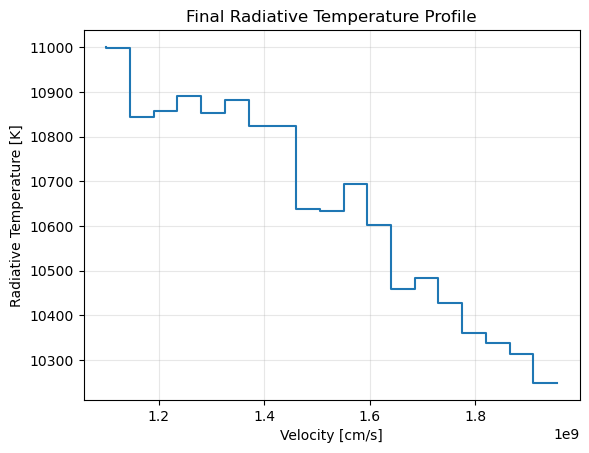

In [19]:
# Solution
# Plot the final radiative temperature vs velocity
plt.plot(geometry.v_inner, sim.plasma.t_rad, drawstyle='steps')
plt.xlabel('Velocity [cm/s]')
plt.ylabel('Radiative Temperature [K]')
plt.title('Final Radiative Temperature Profile')
plt.grid(True, alpha=0.3)

# Inspecting the Plasma

Now let's dive in to one of the two most important parts of the simulation. The plasma object exists to calculate the number densities that we've talked so much about and is very similar to what we saw yesterday. Let's start by grabbing saving it to a new variable so we can play with it easily.

In [20]:
plasma = sim.plasma

All the ion number densities are held in the dataframe in the next cell. Notice that now the columns correspond to each of the shells.

In [21]:
plasma.ion_number_density

0             1             2   \
atomic_number ion_number                                             
8             0           6.608459e+03  5.629125e+03  5.280654e+03   
              1           5.393986e+08  4.096554e+08  3.143763e+08   
              2           2.300916e+04  1.439619e+04  6.300824e+03   
              3           2.461060e-10  1.252924e-10  2.314710e-11   
              4           0.000000e+00  0.000000e+00  0.000000e+00   
...                                ...           ...           ...   
20            16          0.000000e+00  0.000000e+00  0.000000e+00   
              17          0.000000e+00  0.000000e+00  0.000000e+00   
              18          0.000000e+00  0.000000e+00  0.000000e+00   
              19          0.000000e+00  0.000000e+00  0.000000e+00   
              20          0.000000e+00  0.000000e+00  0.000000e+00   

                                    3             4             5   \
atomic_number ion_number                                             
8             0           4.043485e+03  3.014197e+03  2.412016e+03   
              1           2.435939e+08  1.904488e+08  1.501488e+08   
              2           4.762540e+03  3.919703e+03  2.660279e+03   
              3           1.738867e-11  1.600889e-11  8.620571e-12   
              4           0.000000e+00  0.000000e+00  0.000000e+00   
...                                ...           ...           ...   
20            16          0.000000e+00  0.000000e+00  0.000000e+00   
              17          0.000000e+00  0.000000e+00  0.000000e+00   
              18          0.000000e+00  0.000000e+00  0.000000e+00   
              19          0.000000e+00  0.000000e+00  0.000000e+00   
              20          0.000000e+00  0.000000e+00  0.000000e+00   

                                    6             7             8   \
atomic_number ion_number                                             
8             0           1.815252e+03  1.483686e+03  1.125829e+03   
              1           1.193046e+08  9.549260e+07  7.695949e+07   
              2           2.202300e+03  1.461129e+03  1.182031e+03   
              3           7.779006e-12  3.810816e-12  3.068150e-12   
              4           0.000000e+00  0.000000e+00  0.000000e+00   
...                                ...           ...           ...   
20            16          0.000000e+00  0.000000e+00  0.000000e+00   
              17          0.000000e+00  0.000000e+00  0.000000e+00   
              18          0.000000e+00  0.000000e+00  0.000000e+00   
              19          0.000000e+00  0.000000e+00  0.000000e+00   
              20          0.000000e+00  0.000000e+00  0.000000e+00   

                                    9             10            11  \
atomic_number ion_number                                             
8             0           1.044757e+03  8.166757e+02  5.885073e+02   
              1           6.242498e+07  5.094397e+07  4.181358e+07   
              2           5.600923e+02  4.460220e+02  4.433412e+02   
              3           5.858273e-13  4.474681e-13  6.024235e-13   
              4           0.000000e+00  0.000000e+00  0.000000e+00   
...                                ...           ...           ...   
20            16          0.000000e+00  0.000000e+00  0.000000e+00   
              17          0.000000e+00  0.000000e+00  0.000000e+00   
              18          0.000000e+00  0.000000e+00  0.000000e+00   
              19          0.000000e+00  0.000000e+00  0.000000e+00   
              20          0.000000e+00  0.000000e+00  0.000000e+00   

                                    12            13            14  \
atomic_number ion_number                                             
8             0           5.031292e+02  4.575190e+02  3.412122e+02   
              1           3.450616e+07  2.862225e+07  2.385740e+07   
              2           2.819290e+02  1.543272e+02  1.442706e+02   
              3           2.442999e-13  6.

Let's do a quick pandas operation to normalize that number densities, just so that we can more easily understand what's going on in each shell. 

In [22]:
normalized_ions = plasma.ion_number_density / plasma.ion_number_density.groupby('atomic_number').sum()

Text(0, 0.5, 'Fractional Population')

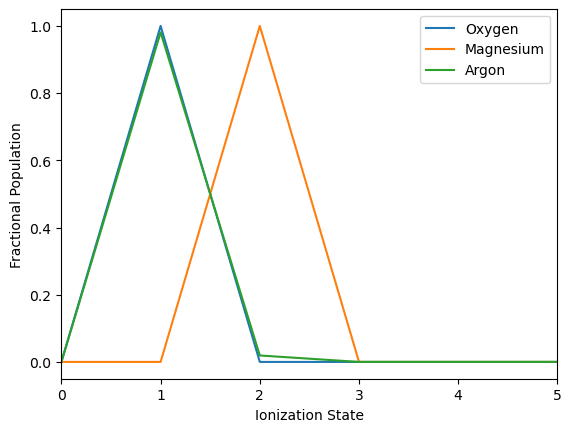

In [23]:
# This cell will plot the normalized ionization densities of Oxygen, Magnesium, and Argon. 
SHELL_ID = 15 #Pick a shell to take a look at. The current model has shells labeled 0-19

plt.plot(normalized_ions.loc[8][SHELL_ID],  alpha=1, label='Oxygen')
plt.plot(normalized_ions.loc[12][SHELL_ID], alpha=1,  label='Magnesium')
plt.plot(normalized_ions.loc[18][SHELL_ID], alpha=1,  label='Argon')
plt.legend()
plt.xlim(0, 5)
plt.xlabel('Ionization State')
plt.ylabel('Fractional Population')

### Ionization Patterns Across the Ejecta

Notice that in shell 15, the different elements are almost entirely in one ionization state or another. This is very important for understanding why certain lines may or may not appear in a supernova spectrum, but as we'll see later are not necessarily the whole story. 

Let's examine how the ionization front changes across the ejecta by looking at Argon's behavior.

Text(0.5, 1.0, 'Argon Ionization State')

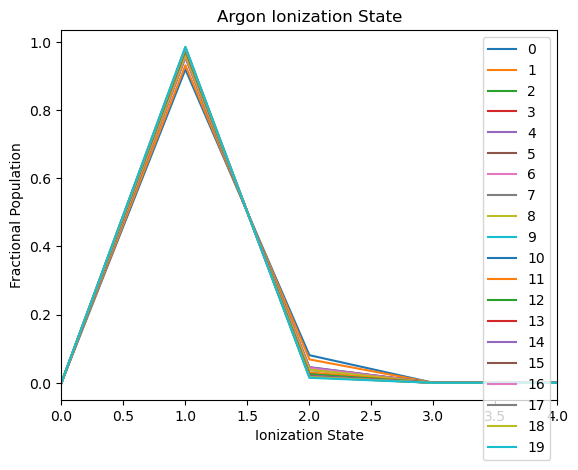

In [24]:
ATOMIC_NUMBER = 18 #Picking Argon

for column in normalized_ions.columns:
    plt.plot(normalized_ions.loc[ATOMIC_NUMBER][column], label=column)
    
plt.xlim(0,4)
plt.legend()
plt.xlabel('Ionization State')
plt.ylabel('Fractional Population')
plt.title('Argon Ionization State')

### **TASK**: Analyze Oxygen Ionization

**$\blacktriangleright$ Compare and Contrast** - Now let's examine how Oxygen behaves compared to Argon.

**Your task:** Create a similar plot for Oxygen and analyze the differences:

1. **Make the plot** using the code structure from the Argon example above
2. **Observe the pattern** - How does Oxygen's ionization change across shells?


In [25]:
# Your code here - create an Oxygen ionization plot similar to the Argon one above
ATOMIC_NUMBER = ? # Oxygen

# Plot the ionization states across different shells
for column in normalized_ions.columns:
    plt.plot(normalized_ions.loc[ATOMIC_NUMBER][column], label=column)
    
plt.xlim(0,4)
plt.legend()
plt.xlabel('Ionization State')
plt.ylabel('Fractional Population')
plt.title('Oxygen Ionization State Across Shells')

SyntaxError: invalid syntax (462799791.py, line 2)

Text(0.5, 1.0, 'Oxygen Ionization State Across Shells')

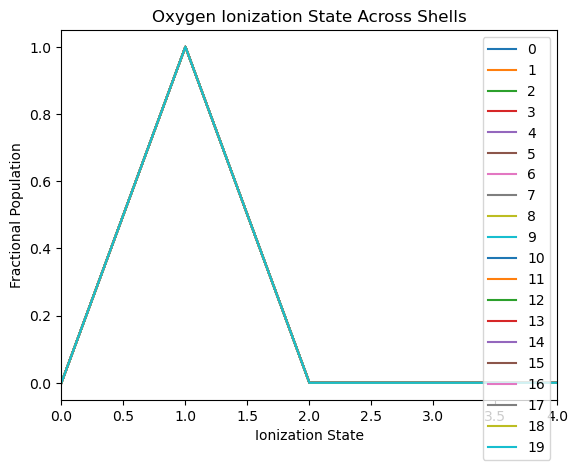

In [26]:
# solution
# Your code here - create an Oxygen ionization plot similar to the Argon one above
ATOMIC_NUMBER = 8  # Oxygen

# Plot the ionization states across different shells
for column in normalized_ions.columns:
    plt.plot(normalized_ions.loc[ATOMIC_NUMBER][column], label=column)
    
plt.xlim(0,4)
plt.legend()
plt.xlabel('Ionization State')
plt.ylabel('Fractional Population')
plt.title('Oxygen Ionization State Across Shells')


Let's also look at the excitation level densities, and normalize them again so we can put them on a reasonable scale and not worry about the overall density decreasing as we move out through the ejecta.

In [27]:
normalized_levels = plasma.level_number_density / plasma.level_number_density.groupby(['atomic_number', 'ion_number']).sum()

While we won't ask any specific questions about it here, as always feel free to play with any of these plots. You can choose whichever shell or atomic number in the simulation you want to see how the number densities change in our simulation. 

Text(0.5, 0, 'Excitation Level')

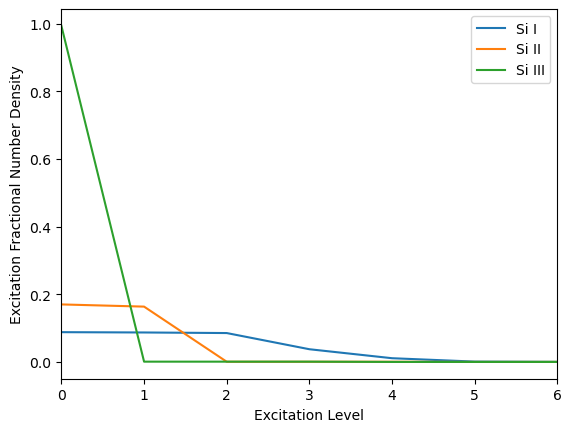

In [28]:
SHELL_ID = 10 #Picking the 10th SHELL for plotting. 
ATOMIC_NUMBER = 14 # Picking Si

plt.plot(normalized_levels.loc[ATOMIC_NUMBER,0][SHELL_ID] / atomic_data.levels.loc[ATOMIC_NUMBER, 0].g, label='Si I')
plt.plot(normalized_levels.loc[ATOMIC_NUMBER,1][SHELL_ID] / atomic_data.levels.loc[ATOMIC_NUMBER, 1].g, label='Si II')
plt.plot(normalized_levels.loc[ATOMIC_NUMBER,2][SHELL_ID] / atomic_data.levels.loc[ATOMIC_NUMBER, 2].g, label='Si III')

plt.legend()
plt.xlim(0, 6)
plt.ylabel('Excitation Fractional Number Density')
plt.xlabel('Excitation Level')

But ultimately what matters is the actual number densities, so let's go back to looking at them directly. 

We can focus again on the $\lambda\lambda$ Si II 6355 $\AA$ doublet. We saw earlier that the $\lambda\lambda$ Si 6355 $\AA$ doublet is two blended lines at 6348 and 6373 $\AA$, transitioning from excited level 7 to 15 and 7 to 13. 

(0.0, 12.0)

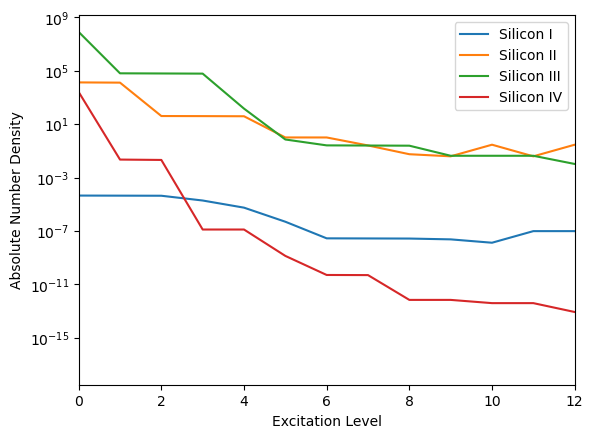

In [29]:
SHELL_ID = 10 #Picking the 10th shell for plotting
ATOMIC_NUMBER = 14 # Picking Si
#Plotting the actual level number densities for different levels of Si
plt.plot(plasma.level_number_density.loc[ATOMIC_NUMBER, 0][SHELL_ID]/ atomic_data.levels.loc[ATOMIC_NUMBER, 0].g, label='Silicon I')
plt.plot(plasma.level_number_density.loc[ATOMIC_NUMBER, 1][SHELL_ID]/ atomic_data.levels.loc[ATOMIC_NUMBER, 1].g, label='Silicon II')
plt.plot(plasma.level_number_density.loc[ATOMIC_NUMBER, 2][SHELL_ID]/ atomic_data.levels.loc[ATOMIC_NUMBER, 2].g, label='Silicon III')
plt.plot(plasma.level_number_density.loc[ATOMIC_NUMBER, 3][SHELL_ID]/ atomic_data.levels.loc[ATOMIC_NUMBER, 3].g, label='Silicon IV')

plt.legend()
plt.yscale('log')
plt.xlabel('Excitation Level')
plt.ylabel('Absolute Number Density')
plt.xlim(0, 12)

### Understanding Si II Line Formation

Remember, this is ultimately what matters for seeing which lines appear in the spectrum. We need to know how many particles are present to interact with photons on their way out of the ejecta.

**$\blacktriangleright$ The Si II Puzzle** - If most Silicon is in Si III, at low excitation states, how do we see strong Si II lines?

Looking at our plot, Si III dominates the number densities, yet we know Si II 6355 Å is a prominent supernova feature. The answer lies in understanding:

1. **Population vs. transition strength** - Even small populations can create strong lines
2. **Oscillator strength** - Some transitions are much more probable than others
3. **Optical depth** - The combination of number density and cross-section determines line strength

Let's investigate this by examining the oscillator strengths and optical depths.

# Towards Opacities, in TARDIS

We've seen a couple times that the opacity of a line is proportional to the number density of the line as well as the cross section, and the cross section is proportional to the oscillator strength. Let's take a look at the oscillator strengths of Si I.

In [30]:
atomic_data.lines.loc[14,1] #This is Silicon II 

[py.warnings         ][WARNING]  /var/folders/n4/hw688njd0_1164p8dnqc6v_h0000gn/T/ipykernel_98009/867247619.py:1: PerformanceWarning:

indexing past lexsort depth may impact performance.

 (warnings.py:110)


,,line_id,wavelength,f_ul,f_lu,nu,B_lu,B_ul,A_ul,wavelength_cm
level_number_lower,level_number_upper,,,,,,,,,
1,71,64912,805.098000,0.000345,0.000345,3.723677e+15,4.664706e+06,4.664706e+06,3.551279e+06,0.000008
0,71,64910,803.241000,0.001770,0.003540,3.732285e+15,4.773659e+07,2.386830e+07,1.829745e+07,0.000008
15,71,65174,2312.438986,0.000847,0.000847,1.296434e+15,3.288863e+07,3.288863e+07,1.056676e+06,0.000023
13,71,65171,2309.236281,0.004246,0.008491,1.298232e+15,3.292107e+08,1.646053e+08,5.310623e+06,0.000023
26,71,65395,4851.908182,0.002280,0.002280,6.178857e+14,1.857326e+08,1.857326e+08,6.460365e+05,0.000049
...,...,...,...,...,...,...,...,...,...,...
32,52,65659,17187.801406,0.027984,0.027984,1.744216e+14,8.075434e+09,8.075434e+09,6.318465e+05,0.000172
33,52,65660,17188.303542,0.753199,1.004266,1.744165e+14,2.898126e+11,2.173595e+11,1.700537e+07,0.000172
23,37,65572,9415.247525,0.954993,1.193741,3.184117e+14,1.887023e+11,1.509619e+11,7.185860e+07,0.000094


Now take a look at the lines that appear in the 7th excited state.

In [31]:
atomic_data.lines.loc[14,1,7]

[py.warnings         ][WARNING]  /var/folders/n4/hw688njd0_1164p8dnqc6v_h0000gn/T/ipykernel_98009/240601312.py:1: PerformanceWarning:

indexing past lexsort depth may impact performance.

 (warnings.py:110)


,line_id,wavelength,f_ul,f_lu,nu,B_lu,B_ul,A_ul,wavelength_cm
level_number_upper,,,,,,,,,
15,65494,6348.864031,0.495382,0.990764,4.721986e+14,1.056092e+11,5.280458e+10,8.197665e+07,0.000063
13,65498,6373.132547,0.496558,0.496558,4.704005e+14,5.313228e+10,5.313228e+10,8.154669e+07,0.000064
65,65103,1734.960000,0.000755,0.001510,1.727950e+15,4.398403e+07,2.199201e+07,1.673028e+06,0.000017
64,65104,1736.197000,0.000548,0.000548,1.726719e+15,1.598102e+07,1.598102e+07,1.213149e+06,0.000017
48,65111,1860.647000,0.000953,0.000953,1.611227e+15,2.976251e+07,2.976251e+07,1.835626e+06,0.000019
26,65237,2605.199238,0.000466,0.000931,1.150747e+15,4.072363e+07,2.036182e+07,4.575097e+05,0.000026
49,65110,1859.658000,0.000809,0.001618,1.612084e+15,5.051712e+07,2.525856e+07,1.560329e+06,0.000019


We immediately see that that oscillator strengths of the transitions to 15 and 13 are orders of magnitude higher than any of the other transitions. This is ultimately why these lines matter so much in so many different SNe Ia. We can verify this by taking a look at the optical depths calculated by the TARDIS plasma.

In [32]:
sim.plasma.tau_sobolevs

0   \
atomic_number ion_number level_number_lower level_number_upper                 
14            5          0                  36                  0.000000e+00   
                                            35                  0.000000e+00   
                                            34                  0.000000e+00   
                         1                  35                  0.000000e+00   
                         0                  33                  0.000000e+00   
...                                                                      ...   
20            0          176                191                 7.848942e-12   
                         177                191                 5.885857e-12   
                         178                191                 3.915677e-13   
                         138                144                 2.816171e-10   
                         177                190                 1.044313e-13   

                                                                          1   \
atomic_number ion_number level_number_lower level_number_upper                 
14            5          0                  36                  0.000000e+00   
                                            35                  0.000000e+00   
                                            34                  0.000000e+00   
                         1                  35                  0.000000e+00   
                         0                  33                  0.000000e+00   
...                                                                      ...   
20            0          176                191                 5.901459e-12   
                         177                191                 4.425456e-12   
                         178                191                 2.944118e-13   
                         138                144                 2.117453e-10   
                         177                190                 7.851976e-14   

                                                                          2   \
atomic_number ion_number level_number_lower level_number_upper                 
14            5          0                  36                  0.000000e+00   
                                            35                  0.000000e+00   
                                            34                  0.000000e+00   
                         1                  35                  0.000000e+00   
                         0                  33                  0.000000e+00   
...                                                                      ...   
20            0          176                191                 4.660748e-12   
                         177                191                 3.495056e-12   
                         178                191                 2.325151e-13   
                         138                144                 1.673588e-10   
                         177                190                 6.201195e-14   

                                                                          3   \
atomic_number ion_number level_number_lower level_number_upper                 
14            5          0                  36                  0.000000e+00   
                                            35                  0.000000e+00   
                                            34                  0.000000e+00   
                         1                  35                  0.000000e+00   
                         0                  33                  0.000000e+00   
...                                                                      ...   
20            0          176                191                 3.046180e-12   
                         177                191                 2.284305e-12   
                         178                191                 1.519677e-13   
                         138                144                 1.09375

The vast majority of lines in our dataframe have optical depths that are below 1e-10 in every single shell. What about our two Si II transitions?

**$\blacktriangleright$ TASK** Grab the optical depths for the two Si II 6355 $\AA$ transitions. Check both 7 to 13 and 7 to 15.

In [33]:
# Hint: Use the format sim.plasma.tau_sobolevs.loc[atomic_number, ion_number, level_lower, level_upper]

tau_si_7_to_13 =
tau_si_7_to_13

SyntaxError: invalid syntax (181796825.py, line 3)

In [34]:
# Hint: Use the format sim.plasma.tau_sobolevs.loc[atomic_number, ion_number, level_lower, level_upper]

tau_si_7_to_13 = sim.plasma.tau_sobolevs.loc[14, 1, 7, 13]
tau_si_7_to_13

[py.warnings         ][WARNING]  /var/folders/n4/hw688njd0_1164p8dnqc6v_h0000gn/T/ipykernel_98009/1066131945.py:3: PerformanceWarning:

indexing past lexsort depth may impact performance.

 (warnings.py:110)


,,,,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
atomic_number,ion_number,level_number_lower,level_number_upper,,,,,,,,,,,,,,,,,,,,
14,1,7,13,9.399783,6.787758,5.307529,3.679716,2.532426,1.839136,1.29423,0.965714,0.691956,0.564607,0.416303,0.293275,0.230511,0.188853,0.137496,0.10688,0.084443,0.065285,0.050541,0.040848


In [35]:
# Now check the optical depth for the Si II transition from level 7 to 15
tau_si_7_to_15 = 

tau_si_7_to_15

SyntaxError: invalid syntax (1907055681.py, line 2)

In [36]:
# Now check the optical depth for the Si II transition from level 7 to 15
tau_si_7_to_15 = sim.plasma.tau_sobolevs.loc[14, 1, 7, 15]

tau_si_7_to_15

[py.warnings         ][WARNING]  /var/folders/n4/hw688njd0_1164p8dnqc6v_h0000gn/T/ipykernel_98009/1327480644.py:2: PerformanceWarning:

indexing past lexsort depth may impact performance.

 (warnings.py:110)


,,,,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
atomic_number,ion_number,level_number_lower,level_number_upper,,,,,,,,,,,,,,,,,,,,
14,1,7,15,18.705132,13.507316,10.5615,7.322314,5.039331,3.659718,2.575414,1.921678,1.376925,1.123483,0.828379,0.583578,0.458681,0.37578,0.27359,0.212668,0.168022,0.129902,0.100564,0.081277


Much higher! 

Let's round all of this out by quickly plotting every optical depth for a single shell of your choice. Ultimately, the takeaway here is that certain lines are very physically favored, but you still need a reasonably high number density of the transition you're interested in to see any specific transition. 

In [37]:
taus_with_wavelengths = sim.plasma.tau_sobolevs.join(atomic_data.lines.wavelength) 
#This line just attaches the wavelength information to the taus, for easier plotting

[py.warnings         ][WARNING]  /var/folders/n4/hw688njd0_1164p8dnqc6v_h0000gn/T/ipykernel_98009/4052530036.py:10: PerformanceWarning:

indexing past lexsort depth may impact performance.

 (warnings.py:110)
[py.warnings         ][WARNING]  /var/folders/n4/hw688njd0_1164p8dnqc6v_h0000gn/T/ipykernel_98009/4052530036.py:11: PerformanceWarning:

indexing past lexsort depth may impact performance.

 (warnings.py:110)


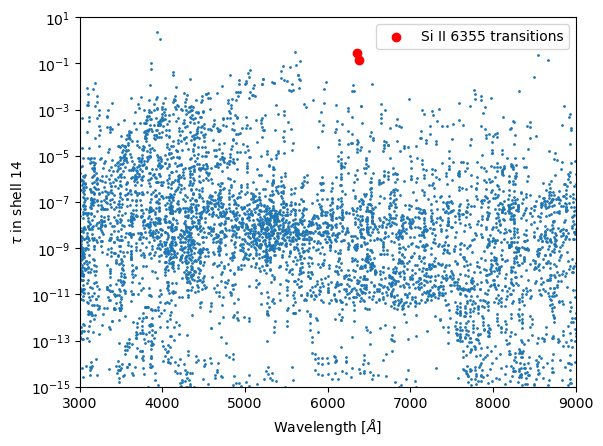

In [38]:
#Feel free to play with this plot too. This is just to demistify what the packets actually 
# interact with inside the simulation, and how many lines are tracked and contribute to a spectrum in TARDIS. 
SHELL = 14 #Change this if you want.
plt.scatter(taus_with_wavelengths.wavelength, taus_with_wavelengths[SHELL], s=1)
plt.yscale('log')
plt.ylim(1e-15,1e1)
plt.xlim(3000, 9000)
plt.xlabel(r'Wavelength [$\AA$]')
plt.ylabel(rf'$\tau$ in shell {SHELL}')
plt.scatter(taus_with_wavelengths.loc[14,1,7,15].wavelength, taus_with_wavelengths.loc[14,1,7,15][SHELL], color='red', label = 'Si II 6355 transitions') #The first transition in the 6355 line
plt.scatter(taus_with_wavelengths.loc[14,1,7,13].wavelength, taus_with_wavelengths.loc[14,1,7,13][SHELL], color='red') #The second transition in the 6355 line
plt.legend()

We see our Si II doublet right there near the top of all the optical depths, and clearly the biggest ones between 6000 and 7000 $\AA$.

However, also take a second to appreciate how many lines we see in the plot. Thousands of lines with relatively low optical depths ultimately shape what we think of as the SN spectrum continuum. 

# Excellent Work! Key Concepts Mastered

Congratulations! You've successfully explored the core physics that drives TARDIS simulations. You've learned how to:

**Critical takeaways:**
- **Atomic data** provides the fundamental physics for ionization and excitation
- **Ionization states** vary dramatically across the ejecta due to changing physical conditions
- **Excitation levels** determine which transitions can produce observable spectral lines
- **Optical depths** reveal which lines will actually appear in the final spectrum
- **Number densities** and **oscillator strengths** work together to create line opacities

### **Understanding the Connection**

The Si II 6355 Å line we explored is a perfect example of how all these pieces fit together:
1. **Right ionization state** (Si II) is abundant in key regions
2. **Right excitation level** (level 7) has sufficient population
3. **Strong transitions** (high oscillator strengths) to levels 13 and 15
4. **High optical depths** make these lines prominent in the spectrum

### **Next Steps**

In the afternoon session, we'll explore:
- How Monte Carlo packets interact with this plasma
- What the final spectrum actually represents
- Different physics treatments and approximations in TARDIS

Take a well-deserved break! When you're ready, you'll dive into the Monte Carlo radiative transfer process that turns this plasma physics into observable spectra.

In [39]:
from IPython import get_ipython
from pathlib import Path
ip = get_ipython()
path = None
if '__vsc_ipynb_file__' in ip.user_ns:
    path = ip.user_ns['__vsc_ipynb_file__']

nb_path = Path(path)
# Get the current notebook name
current_notebook = nb_path.name

# Create the student version by replacing 'instructor' with 'student'
output_notebook = current_notebook.replace('instructor', 'student')

# Run the nbconvert command
!jupyter nbconvert {current_notebook} --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags="['solution']" --to notebook --output {output_notebook}

print(f"Converted {current_notebook} to {output_notebook}")


[NbConvertApp] Converting notebook 2_tardis_connections_instructor.ipynb to notebook
[NbConvertApp] Writing 696721 bytes to 2_tardis_connections_student.ipynb
Converted 2_tardis_connections_instructor.ipynb to 2_tardis_connections_student.ipynb
